In [5]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install seaborn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.0 MB 11.8 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 20.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 22.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   --------------- ------------------------ 17.8/44.8 MB 86.5 MB/s eta 0:00:01
   -------------------------------------- - 43.0/44.8 MB 101.3 MB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 MB 86.3 MB/s eta 0:00:00


# Se importan las dependencias

In [6]:
# Moví todos los import al principio. Es buena práctica porque permite mantener el código más ordenado y facilita la lectura.
# Se utiliza la librería pandas para la manipulación de datos.
import pandas as pd
# Se utiliza la librería seaborn y matplotlib para la visualización de datos, 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB


In [7]:
vinos = pd.DataFrame(load_wine().data,columns = load_wine().feature_names)

# Analisis Exploratorio

In [8]:
vinos.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [21]:
vinos.shape

(178, 13)

In [11]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [12]:
vinos.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


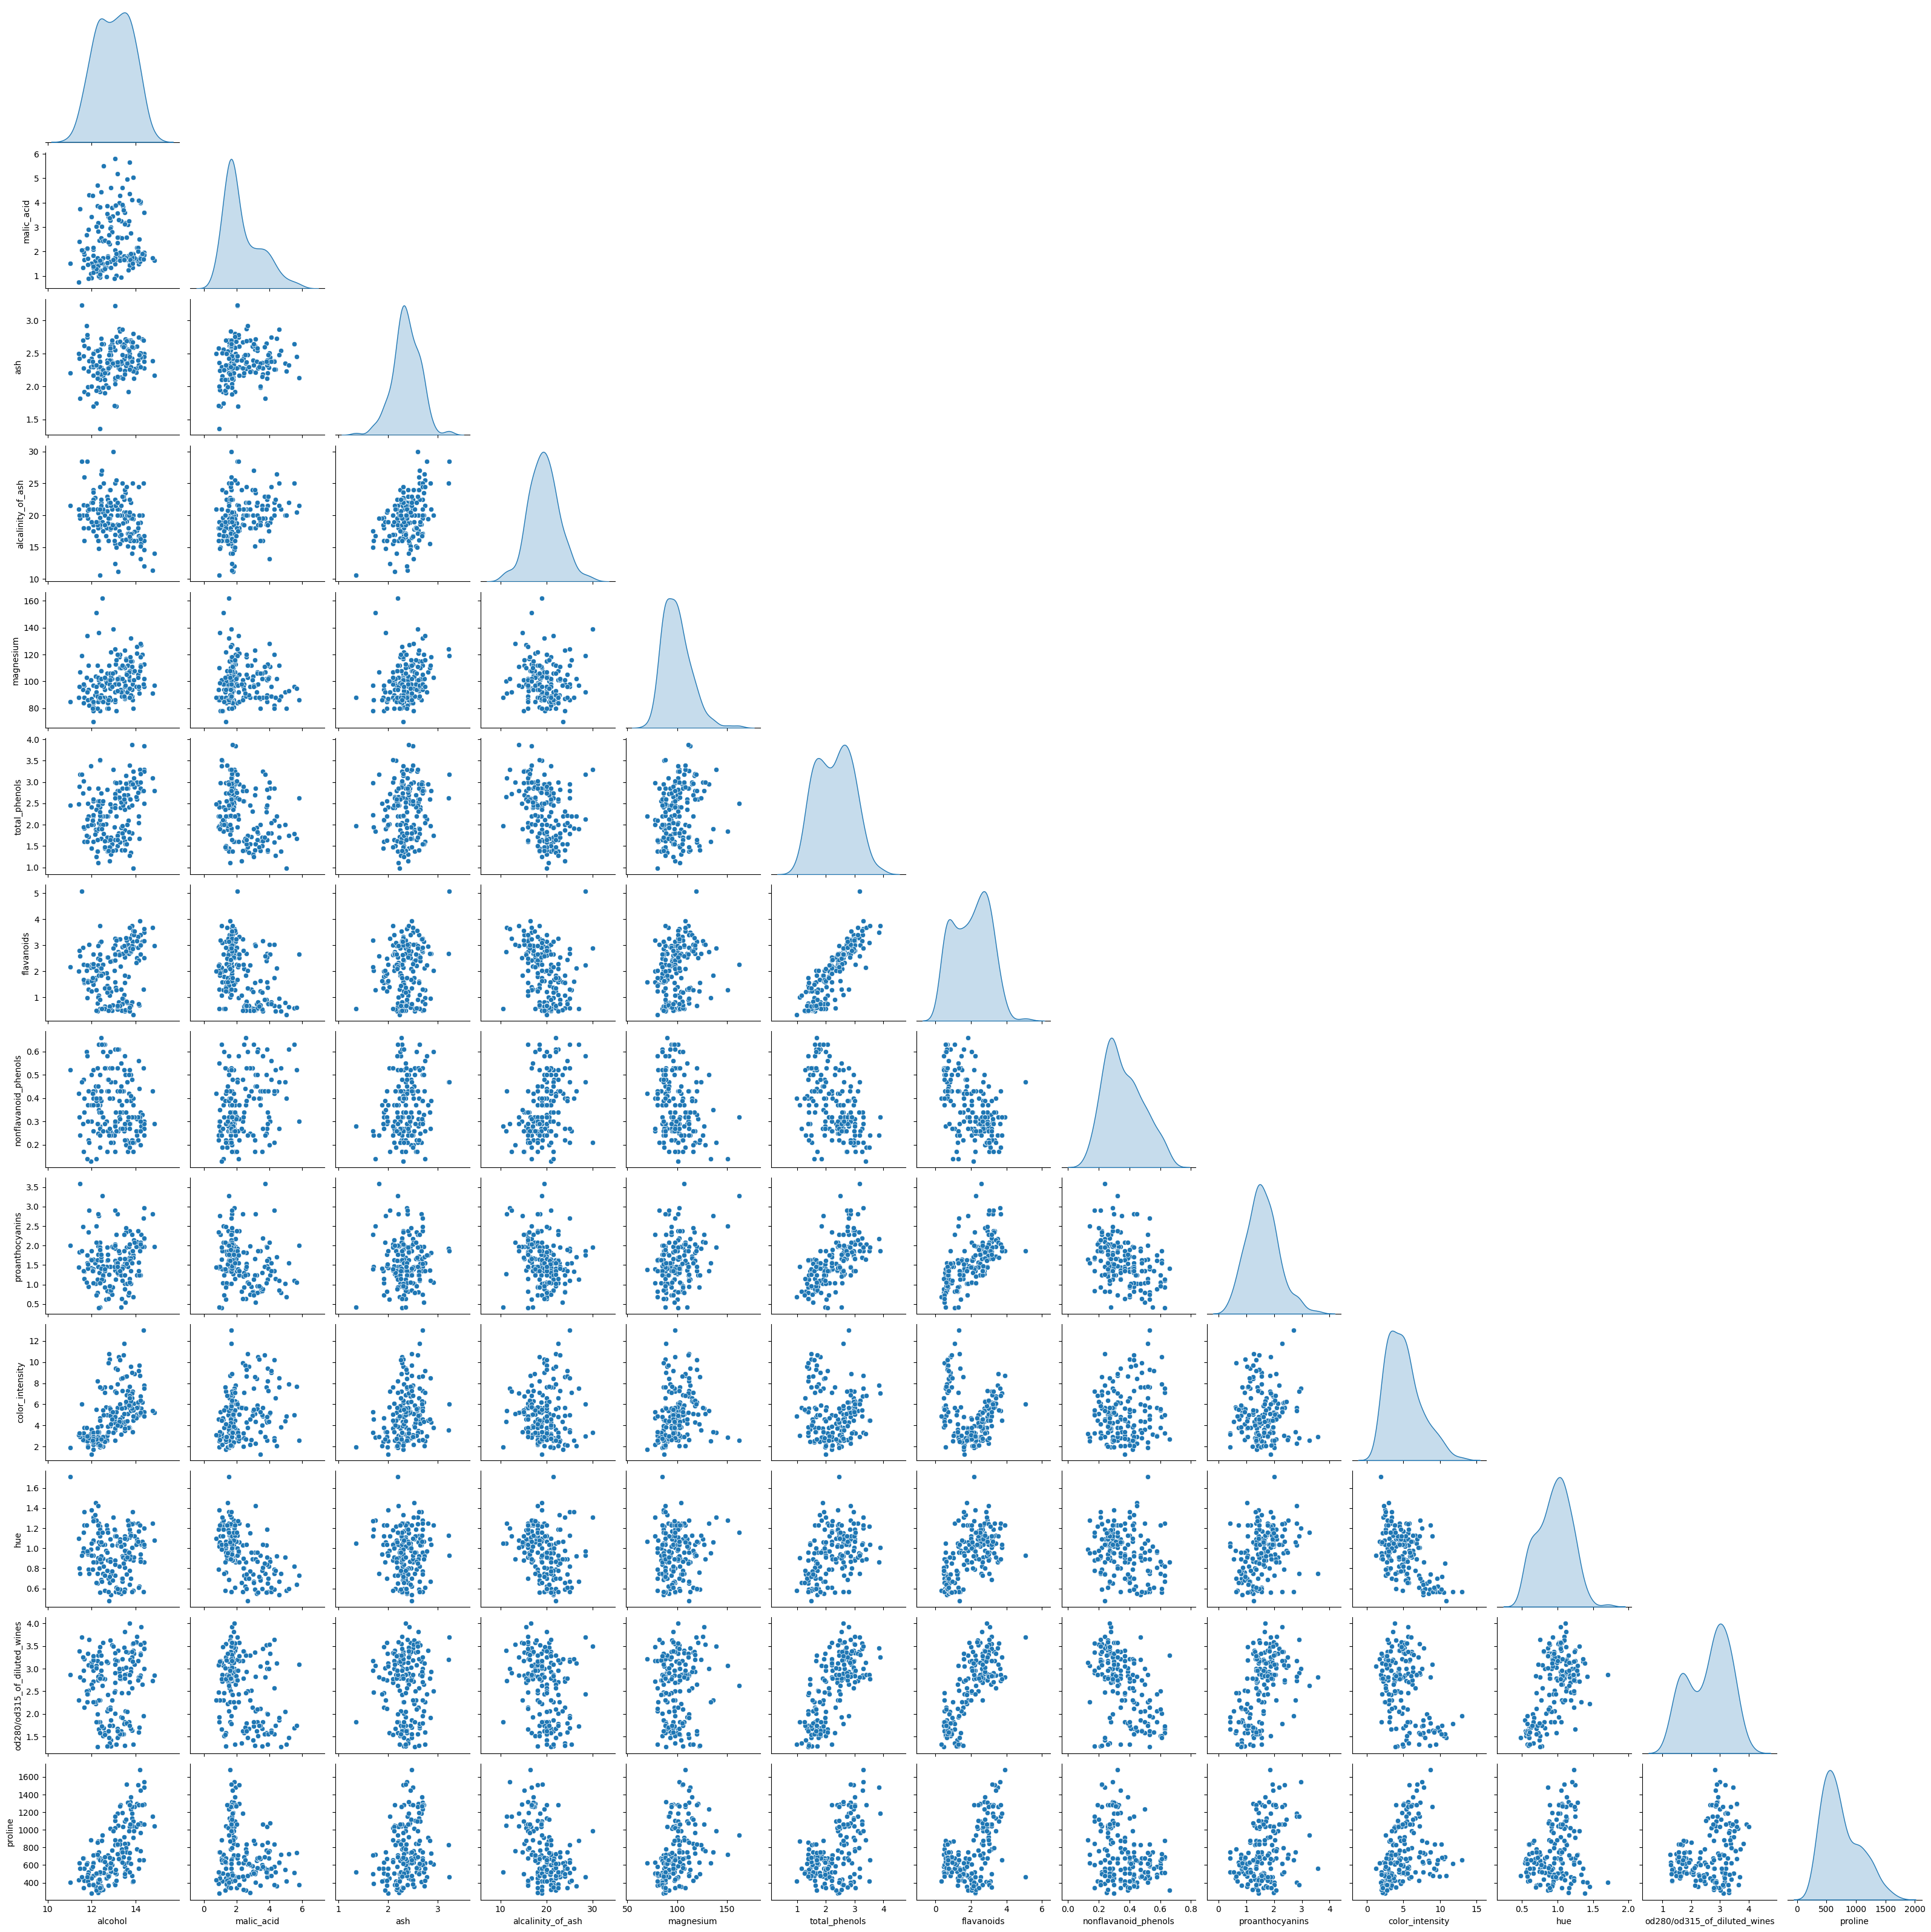

In [13]:
# Visualización de componentes principales en pares
sns.pairplot(vinos, diag_kind='kde', corner=True)  # 'diag_kind' permite mostrar histogramas de densidad en la diagonal principal
plt.show()

## Estandarizar variables


In [8]:
X = StandardScaler(with_std=True,with_mean=True).fit_transform(vinos)
pd.DataFrame(X,columns = load_wine().feature_names).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


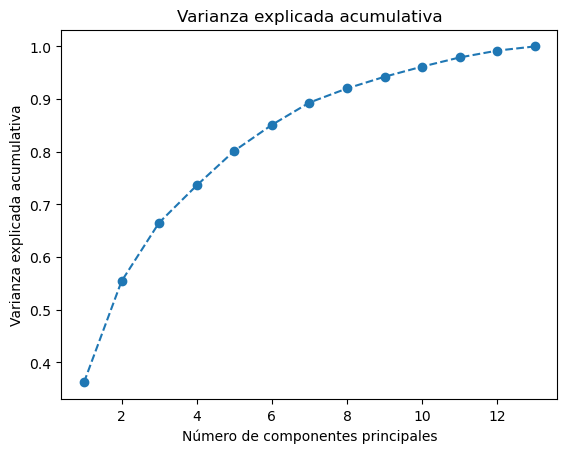

In [9]:
# Crear una instancia de PCA
pca = PCA()

# Aplicar PCA a tus datos estandarizados
principal_components = pca.fit_transform(X)

# Explorar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Visualizar la varianza explicada acumulativa para decidir cuántos componentes conservar


plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulativa')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.show()

# Hasta aca llegue

In [10]:
n_components = 10
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

# Ahora tienes tus datos reducidos a n_components características
pc_df=pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

In [11]:
pca.explained_variance_ratio_[0:9].sum()

0.9423969775056237

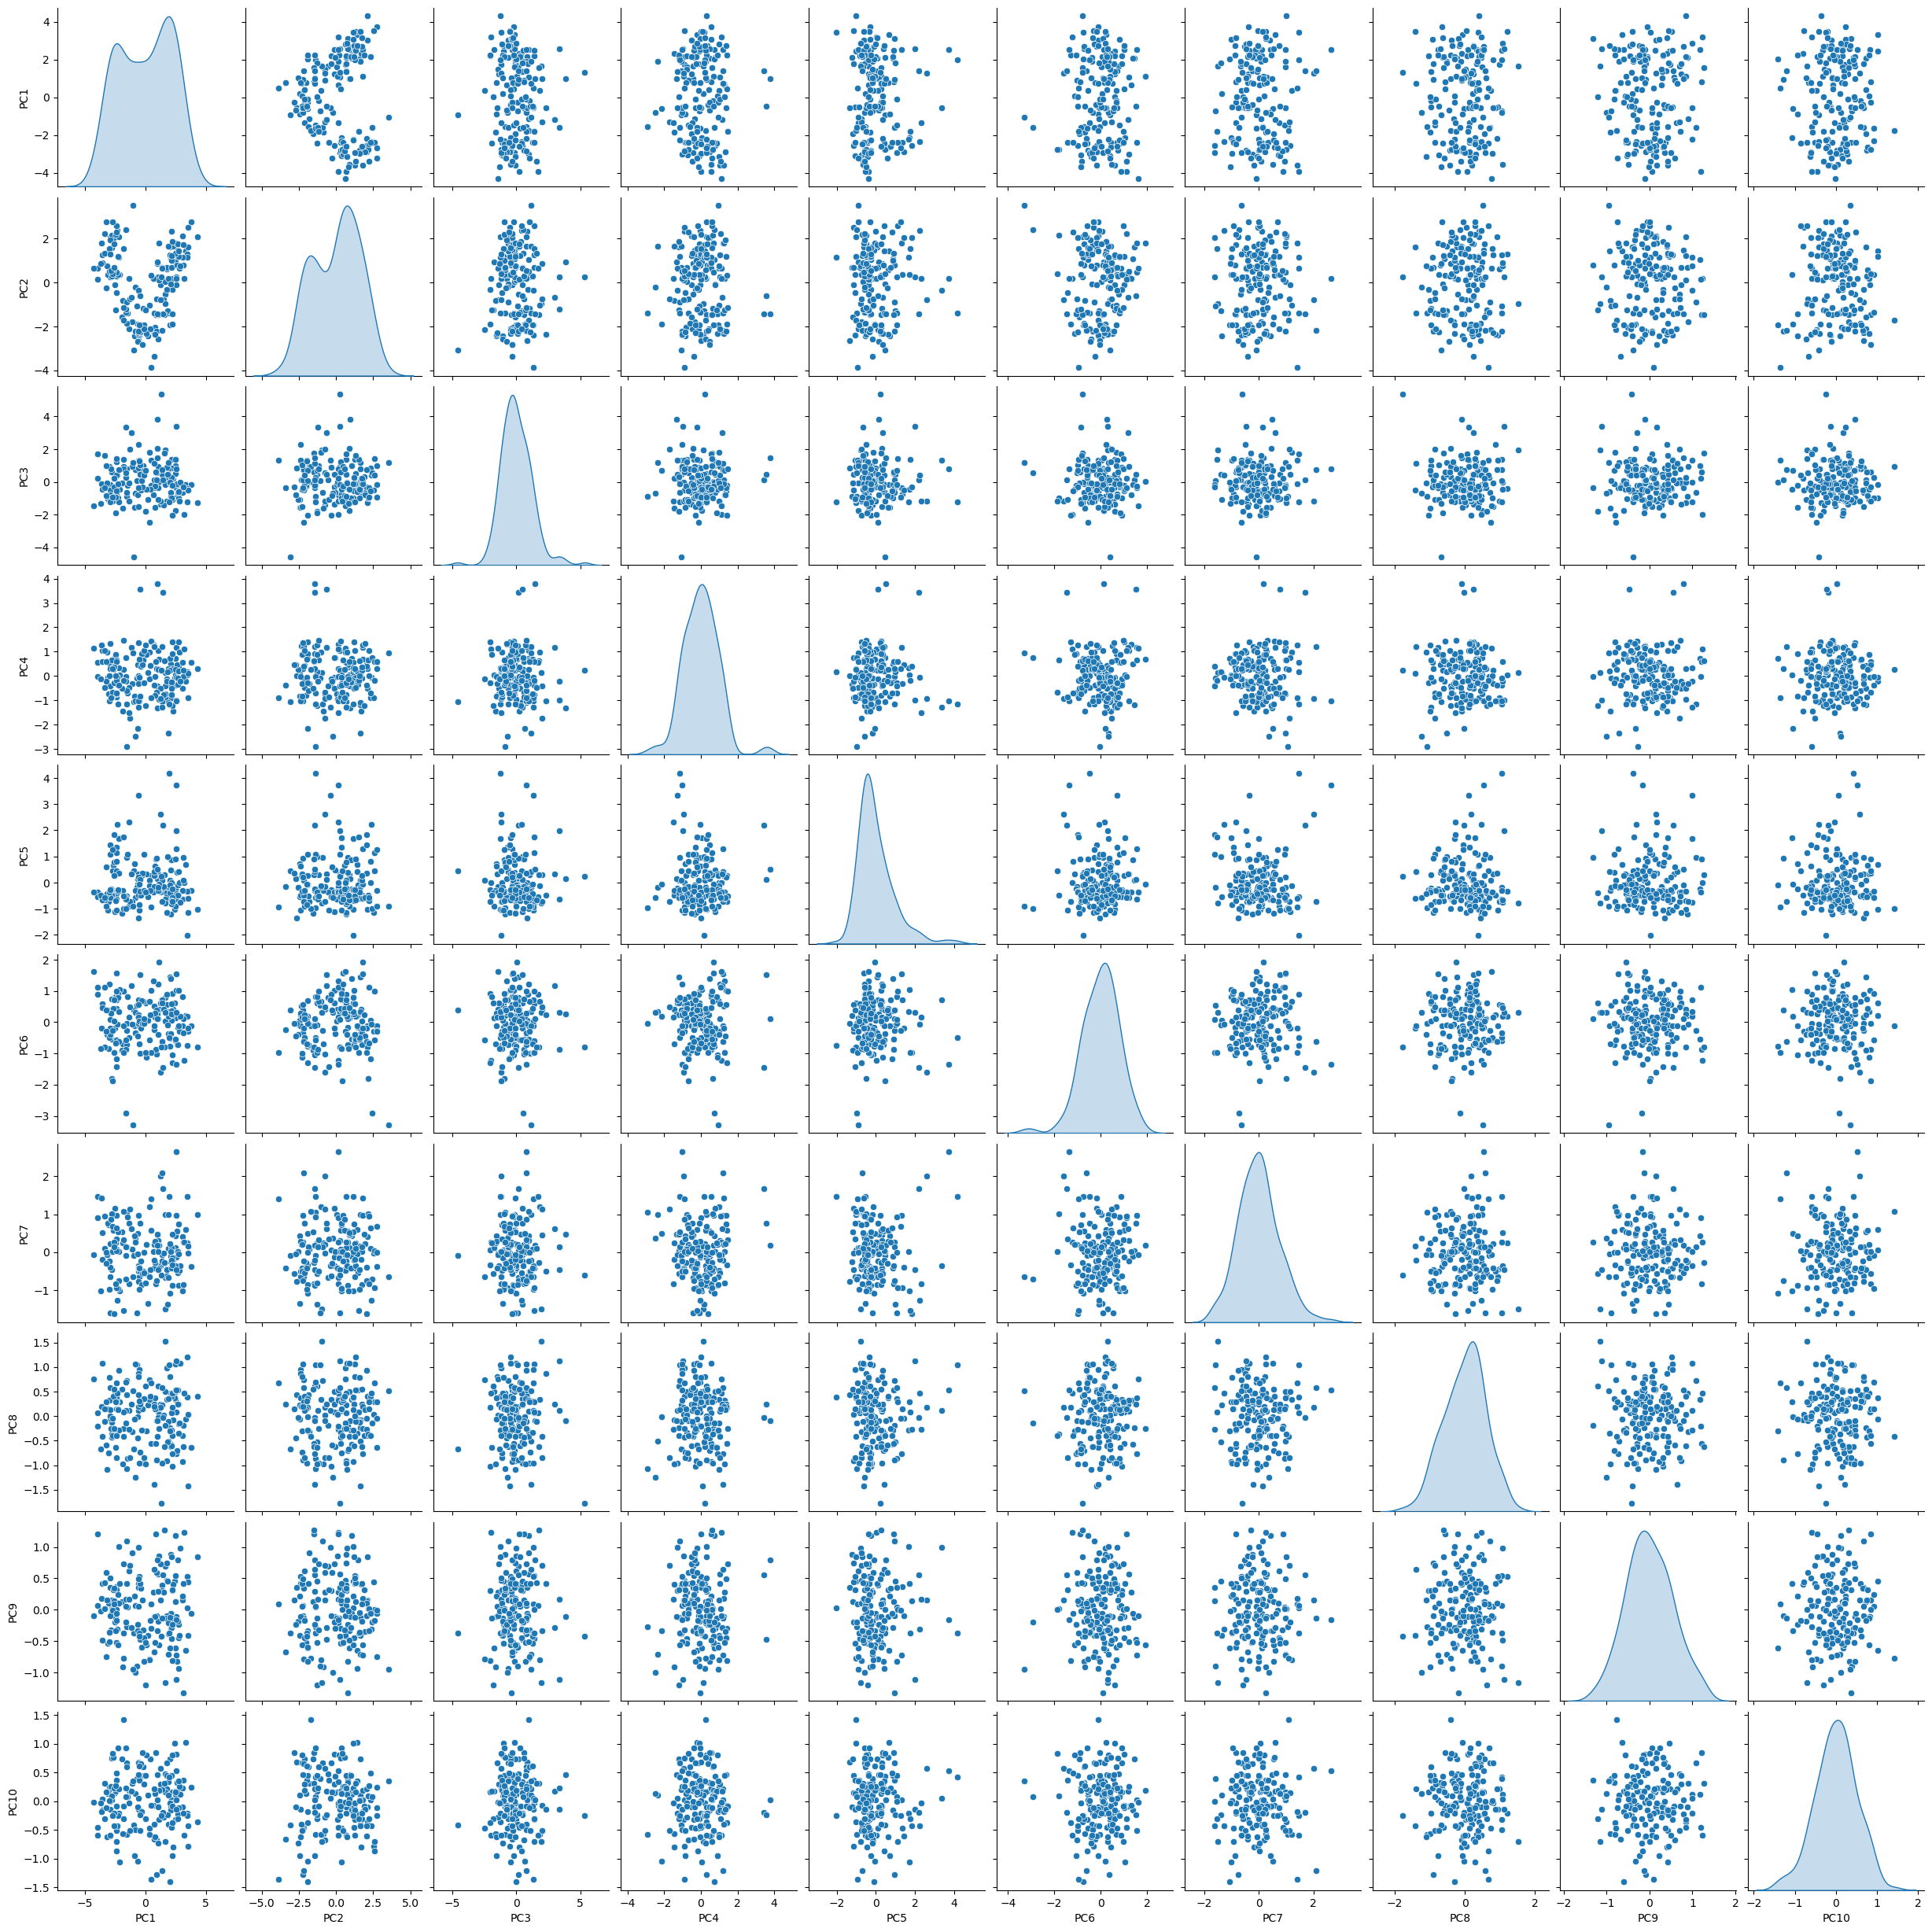

In [12]:
# Visualización de componentes principales en pares
sns.pairplot(pc_df, diag_kind='kde')  # 'diag_kind' permite mostrar histogramas de densidad en la diagonal principal
plt.show()

# Importancia de las variables en cada componente
La elección del número de variables que debemos retener de los componentes principales depende de los objetivos de análisis y de la cantidad de información que estés dispuesto a perder en el proceso de reducción de dimensionalidad.


In [13]:
# Crear un DataFrame con las cargas de cada variable en cada componente principal
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components + 1)], index=cancer.columns)

#Importancia de las variables
loadings_abs = loadings.abs()

# Mostrar las 5 variables con las cargas más altas para cada componente principal
top_loadings = loadings_abs.apply(lambda x: x.nlargest(5).index)

# Mostrar las cargas
print("Cargas de variables en cada componente principal:")
print(top_loadings)

NameError: name 'cancer' is not defined

###  Crear gráficos de barras para las variables más correlacionadas con cada componente principal
Las cargas son los coeficientes que indican la correlación o la contribución de cada variable original a un componente principal.

- Cargas cercanas a 0: Las variables con cargas cercanas a 0 tienen una contribución mínima al componente principal correspondiente y, por lo tanto, tienen poco impacto en la estructura del componente. Puedes considerar eliminar o no darles mucha importancia si deseas simplificar la interpretación del componente.

- Cargas cercanas a 0.6: Las variables con cargas cercanas a 0.6 tienen una contribución significativa al componente principal. Esto significa que estas variables tienen un fuerte impacto en la formación del componente y son importantes para entender la estructura de los datos en ese componente.

- Cargas intermedias: Las cargas que se encuentran entre 0 y 0.6 indican una contribución moderada de la variable al componente principal. Estas variables son relevantes pero pueden no ser tan dominantes como las que tienen cargas más altas. La interpretación de estas cargas dependerá de tu objetivo de análisis y de cómo deseas utilizar los componentes principales.

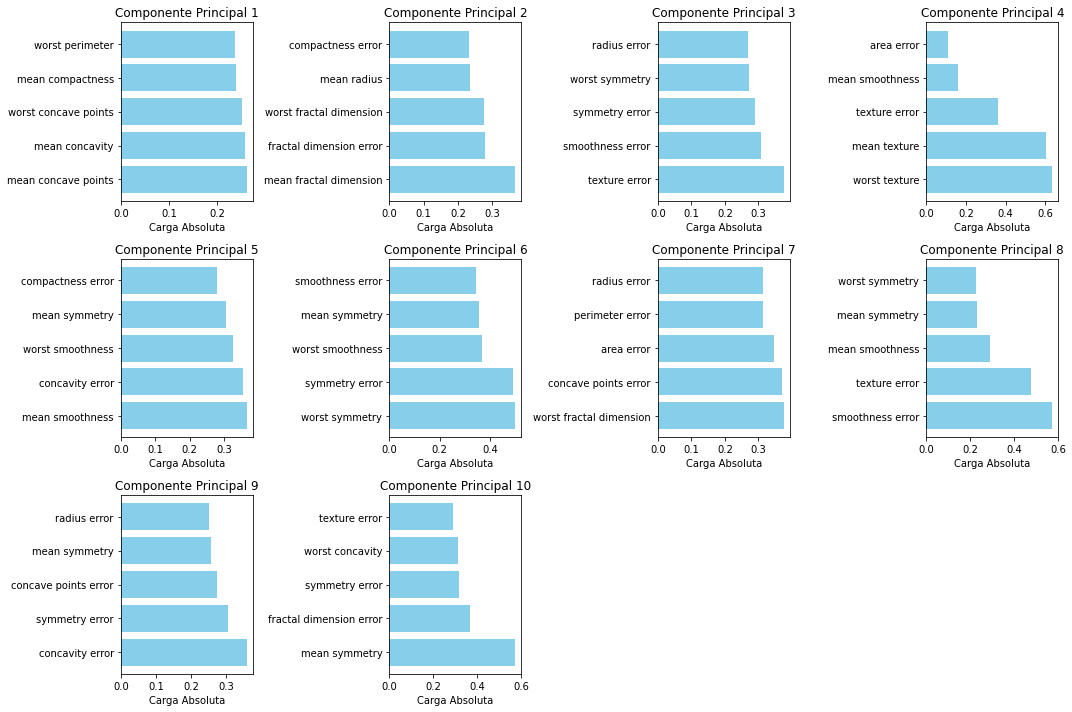

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(n_components):
    plt.subplot(3, 4, i + 1) #grafico de 3 filas y 3 columnas para visualizar cada componente
    top_vars = top_loadings[f'PC{i+1}'] #muestra los variables con mayor importancia para cada componente
    loading_values = loadings_abs[f'PC{i+1}'][top_vars]
    plt.barh(top_vars, loading_values, color='skyblue')
    plt.xlabel('Carga Absoluta')
    plt.title(f'Componente Principal {i+1}')

plt.tight_layout()
plt.show()

##### Nombre de componentes

Componente Principal 1 (PC1): "Características de Contorno y Dimensiones"

Componente Principal 2 (PC2): "Propiedades de Superficie y Textura"

Componente Principal 3 (PC3): "Errores de Medición y Simetría"

Componente Principal 4 (PC4): "Características de Composición y Suavidad"

Componente Principal 5 (PC5): "Errores de Textura y Simetría"

Componente Principal 6 (PC6): "Propiedades de Suavidad y Dimensión Fractal"

Componente Principal 7 (PC7): "Características de Dimensión Fractal y Puntos de Contorno"



In [ ]:

model = GaussianNB()

In [ ]:
cancer_type= load_breast_cancer().target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pc_df, cancer_type, train_size = 0.7, random_state=1234)

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
labels = model.predict(X_test)

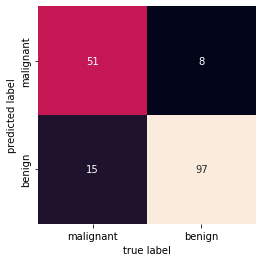

In [ ]:

mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
print(f'precision: {precision_score(labels,y_test)}')
print(f'recall: {recall_score(labels,y_test)}')
print(f'accuracy: {accuracy_score(labels,y_test)}')
print(f'f1 score: {f1_score(labels,y_test)}')


precision: 0.9238095238095239
recall: 0.8660714285714286
accuracy: 0.8654970760233918
f1 score: 0.8940092165898618
